In [2]:
# CREATE GROMACS version 5 .gro FILE of SAM CONSITING OF 
# CARBON CHAINS WITH  CH3- AND OH- HEAD GROUPS
# C1 AND O1 AT THE SAME z-LEVEL
# CH2 and CH3 TREATED AS SINGLE MOLECULES (GROUP COORDINATES)

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
#!/usr/bin/env python

import numpy as np
import math
import matplotlib.pyplot as plt
import sys

In [3]:
xcopies = 1
ycopies = 1

Nx = 10 # number of gridpoints in x-direction (carbons)
Ny = 10 # number of gridpoints in y-direction (carbons)

Nx = Nx*xcopies # number of gridpoints in x-direction (carbons)
Ny = Ny*ycopies # number of gridpoints in y-direction (carbons)

a0 = 5.0
zPos = 21.680

xinterval = 2
yinterval = 2

oxygens 25
carbons 100
pc=  25


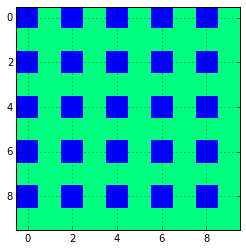

In [4]:
pType = np.zeros([Nx,Ny],dtype=str) # particle type

# set standard particle type as Carbon
for i in range(Nx):
  for j in range(Ny):
    pType[i,j] = 'C' 

# exchange Carbons with oxygens
n = 0
for l in range(0,Ny,yinterval):
    for k in range(0,Nx,xinterval):
        pType[k,l] = 'O' 
        n = n+1
        
print "oxygens",n
print "carbons", Nx*Ny
pc = n/(float(Nx)*float(Ny))
print "pc= ", int(pc*100)


################################## PLOT HEAT MAP  ######################################
#   create array with 0s where there is O and ones where there is C:
Z = np.zeros([Nx,Ny],dtype=int)
for i in range(Nx):
  for j in range(Ny):
    if pType[i,j] == 'C':
      Z[i,j] = 1
      
#    PLOT as heatmap
fig, ax = plt.subplots()
ax.imshow(Z, cmap=plt.cm.winter, interpolation='nearest')
ax.grid()
plt.show()
#fig.savefig('output_' + str(Percentage) + '_heatmap.pdf',format='pdf')

In [5]:
#V = (Vx,Vy) first basis vector 
Vx = a0
Vy = 0
# W = (Wx,Wy) second basis vector 
Wx = a0*np.sin(np.pi/6)
Wy = a0*np.cos(np.pi/6)

# create arrays that hold particle positions
xPos = np.zeros([Nx,Ny],dtype=float) # x positions of particles
yPos = np.zeros([Nx,Ny],dtype=float) # y positions of particles
zlastPos = np.zeros([Nx,Ny],dtype=float) # zlastPos ONLY will serve to calculate the box height (z)


# set particle positions
for j in range(Ny):
    x_shift = j - counter
    for i in range(Nx):
        xPos[i,j] = i*Vx + j*Wx
        yPos[i,j] = i*Vy + j*Wy

n=0
for k in range(0,Nx,yinterval):
    for l in range(0,Ny,xinterval):
        pType[k,l] = 'O' 
        n = n+1
for k in range(yinterval,Nx,xinterval*2):
    for l in range(xinterval,Ny,xinterval*2):
        if pType[k,l] != 'O':
            pType[k,l] = 'O' 
            n = n+1

print "oxygens",n
print "carbons", Nx*Ny
pc = n/(float(Nx)*float(Ny))
print "pc= ", int(pc*100)

# move last atoms of every row (except lowest) to the left to get a rectangular shape
for j in range(Ny):
    for i in range(Nx):
        if xPos[i,j]>xPos[-1,1]:
           xPos[i,j] = xPos[(i-Nx+1),j-2]
        

################################## PLOT GRID  ######################################
SizeOfDots = 8
fig, ax = plt.subplots()
for i in range(Nx):
  for j in range(Ny):
    if pType[i,j] == 'O':
      ax.plot([xPos[i,j]],[yPos[i,j]],marker='o',markersize=SizeOfDots,color='blue')
    else:
      ax.plot([xPos[i,j]],[yPos[i,j]],marker='o',markersize=SizeOfDots,color='green')
text = ', Grid '+ str(Nx)+'x'+str(Ny)    
plt.title("Percentage = " + str(int(pc*100))+text, fontsize= 14)
plt.grid()
plt.show()
#fig.savefig('output_' + str(Percentage) + '_positions.pdf',format='pdf')

NameError: name 'counter' is not defined

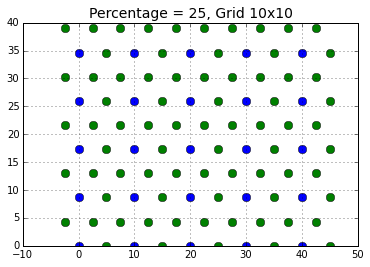

In [6]:
counter = 0
# set particle positions
for j in range(Ny):
    x_shift = j - counter
    for i in range(Nx):
        xPos[i,j] = i*Vx + j*Wx - x_shift*Vx
        yPos[i,j] = i*Vy + j*Wy
        n = n + 1
    if (j%2):
        counter = counter + 1

################################## PLOT GRID  ######################################
SizeOfDots = 8
fig, ax = plt.subplots()
for i in range(Nx):
  for j in range(Ny):
    if pType[i,j] == 'O':
      ax.plot([xPos[i,j]],[yPos[i,j]],marker='o',markersize=SizeOfDots,color='blue')
    else:
      ax.plot([xPos[i,j]],[yPos[i,j]],marker='o',markersize=SizeOfDots,color='green')
text = ', Grid '+ str(Nx)+'x'+str(Ny)    
plt.title("Percentage = " + str(int(pc*100))+text, fontsize= 14)
plt.grid()
plt.show()
#fig.savefig('output_' + str(Percentage) + '_positions.pdf',format='pdf')

In [8]:
# WARNING!!!! THIS CELL HAS TO RUN 2 TIMES TO GET THE CORRECT VALUES (see comment of zbox)

%cd /Users/burbol2/Desktop/
#############################################  PDB FILE WRITTING    ###################################################
xbox = round(xPos.max()-xPos.min()+(a0*0.5),3)
ybox = round(yPos.max()-yPos.min()+Wy,3)
zbox = round(zPos,3)-zlastPos.min() #zlastPos doesn't get a value until the end of this cell => run 2 times!
title = 'sam ' + str(int(pc*100)) + '% OH-coverage'
f = open('start' + str(int(pc*100)) + '.pdb','w')
# save the particle types and positions
f.write('TITLE     ' + title + '\n')
f.write('REMARK    THIS IS A SIMULATION BOX' + '\n')
f.write("CRYST1  %3.3f  %3.3f  %3.3f  90.00  90.00  90.00 P 1           1"%(xbox,ybox,zbox) + '\n')
f.write('MODEL        1' + '\n')

# We start all the counters
chainlength = 65
totalpos=1
chainNum = 0

# First we write the top Head Group
for i in range(Nx):
    for j in range(Ny):   
        chainNum = chainNum +1
        xoldC= round(xPos[i,j],3)
        yoldC= round(yPos[i,j],3)
        zoldC= zPos
        atomtype = pType[i,j]
        indexC = 1
        indexO = 1        
        indexH = 1
        if atomtype == 'O':    #OXYGEN CHAIN
            chainlength = 63
            chaintype='OAM' 
            xnew,ynew,znew,totalpos,indexO,indexH = writeOH(chaintype,chainNum,xoldC,yoldC,zoldC-zLengthCO,totalpos,indexO,indexH)
            
        elif atomtype == 'C':    #CARBON CHAIN parameters
        #Third H atom (H3)
            chainlength = 65
            chaintype='SAM'
            xnew,ynew,znew,totalpos,indexC,indexH = writeCHTOP(chaintype,chainNum,xoldC,yoldC,zoldC-zLengthCCb,totalpos,indexC,indexH)
            
        #here comes the "body" of the chain
        for d in range(9):
 
            ######### CHb #######
            xnew,ynew,znew,totalpos,indexC,indexH = writeCHb(chaintype,chainNum,xnew,ynew,znew,totalpos,indexC,indexH)

            ######### CHa #######
            xnew,ynew,znew,totalpos,indexC,indexH = writeCHa(chaintype,chainNum,xnew,ynew,znew,totalpos,indexC,indexH)

        # At the end of each chain we also write a last CH2 + the Head Group (BOTTOM)
        ######### CHb #######
        xnew,ynew,znew,totalpos,indexC,indexH = writeCHb(chaintype,chainNum,xnew,ynew,znew,totalpos,indexC,indexH)
        
        ######### CHBottom #######
        xnew,ynew,znew,totalpos,indexC,indexH = writeCHBOTTOM(chaintype,chainNum,xnew,ynew,znew,totalpos,indexC,indexH)



/Users/burbol2/Desktop


NameError: name 'writeOH' is not defined